In [148]:
import numpy as np
from scipy.special import expi
dx=.1
x=np.arange(0,50,dx)


sigma=0.165208*np.ones_like(x)


gradx=np.gradient(x)


def tau(i,j):

    s=0
    if i<j:

        s=sigma[i]*gradx[i]+sigma[j]*(gradx[j])
        k=i+1
        while k<j-1:
            s=s+gradx[k]*sigma[k]
            k=k+1
    elif i>j:
        s=sigma[j]*gradx[j]+sigma[i]*gradx[i]

        k=j+1
        while k<i-1:
            s=s+gradx[k]*sigma[k]
            k=k+1

    elif i==j:

            s=sigma[i]*(gradx[i])

    return s 

    
def E(x):
    val=np.exp(-x)/3 - x*np.exp(-x)/6 +x**2*np.exp(-x)/6 +x**3*expi(-x)
    return val
matrix=np.zeros((len(x),len(x)))

for i in range(len(x)):
    val=0
    for j in range(len(x)):
        if i!=j:
            val=(E(tau(i,j))-E((tau(i,j)+tau(i,i)))-E((tau(i,j)+tau(j,j)))+E((tau(i,j)+tau(i,i)+tau(j,j))))/(2*sigma[i]*gradx[i])
            

        if i==j:

            val=(sigma[i]*gradx[i])*((1-(1-2*E(tau(i,i))))/(2*sigma[i]*gradx[i]))

        matrix[i][j]=val

sum(matrix)

array([0.56962122, 0.57308325, 0.57654589, 0.5792303 , 0.58130201,
       0.5828842 , 0.58407264, 0.58494392, 0.58556058, 0.58597439,
       0.58622869, 0.58636007, 0.58639961, 0.58637383, 0.58630542,
       0.58621387, 0.5861159 , 0.58602588, 0.58595613, 0.58591722,
       0.58591818, 0.58596667, 0.58606921, 0.58623122, 0.58645726,
       0.58675105, 0.5871156 , 0.58755327, 0.58806587, 0.58865471,
       0.58932066, 0.59006419, 0.59088541, 0.59178414, 0.59275991,
       0.59381202, 0.59493956, 0.59614141, 0.59741632, 0.59876285,
       0.60017949, 0.60166458, 0.60321639, 0.60483309, 0.60651281,
       0.60825361, 0.61005351, 0.61191049, 0.6138225 , 0.6157875 ,
       0.61780339, 0.6198681 , 0.62197954, 0.62413564, 0.62633433,
       0.62857355, 0.63085127, 0.63316546, 0.63551412, 0.63789528,
       0.64030701, 0.64274738, 0.6452145 , 0.64770654, 0.65022167,
       0.65275811, 0.65531412, 0.65788798, 0.66047804, 0.66308265,
       0.66570023, 0.66832922, 0.67096811, 0.67361543, 0.67626

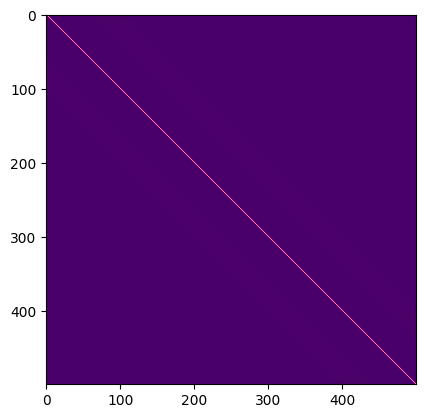

In [149]:
import matplotlib.image as image
import matplotlib.pyplot as plt

plt.imshow(matrix,cmap='RdPu_r')


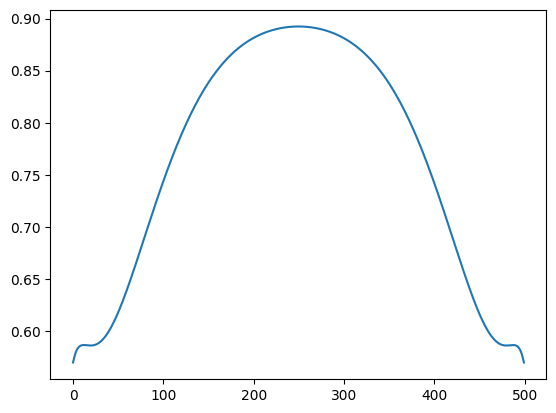

In [150]:

plt.plot(sum(matrix))